<h1><strong> PROJECT 3: DENGUE DATA ANALYSIS</h1>
<p><strong> Analyst: Kristel Imari H. Calado</p>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [4]:
dengue = pd.read_csv('dengue.csv')
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h1 style="font-size: 20px"><strong>Categorical Data Fields</h1>

In [5]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [6]:
dengue['Month'] = dengue ['Month'].astype('category')
dengue['Region'] = dengue ['Region'].astype ('category')

In [7]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Month          1020 non-null   category
 1   Year           1020 non-null   int64   
 2   Region         1020 non-null   category
 3   Dengue_Cases   1020 non-null   int64   
 4   Dengue_Deaths  1020 non-null   int64   
dtypes: category(2), int64(3)
memory usage: 27.1 KB


In [8]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h1 style="font-size: 25px"><strong>EXPLORATORY DATA ANALYSIS (EDA) </h1>

<h1 style="font-size: 20px"><strong>DENGUE CASES AND DEATHS OVER YEARS</h1>

,Dengue_Cases,Dengue_Deaths
Year,,
2016,209544,8127
2017,154155,4563
2018,250783,1226
2019,441902,1733
2020,91041,1195


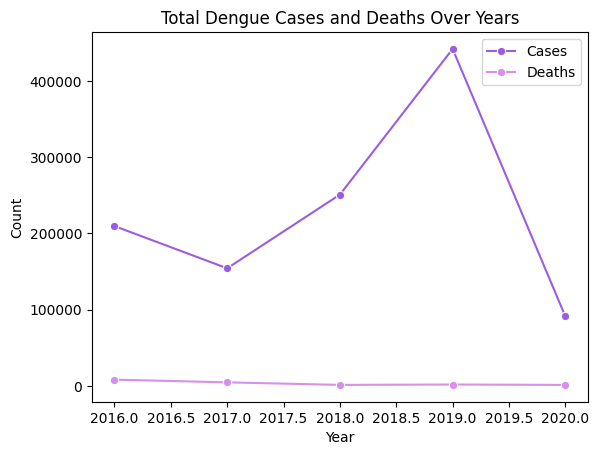

In [9]:
cases_by_year = dengue.groupby("Year")[["Dengue_Cases", "Dengue_Deaths"]].sum()
display(cases_by_year)

#visualizayion
sns.lineplot(data=cases_by_year, x=cases_by_year.index, y="Dengue_Cases", marker="o", color ="#9B5DE0", label="Cases")
sns.lineplot(data=cases_by_year, x=cases_by_year.index, y="Dengue_Deaths", marker="o", color = '#D78FEE', label="Deaths")
plt.title("Total Dengue Cases and Deaths Over Years")
plt.ylabel("Count")
plt.show()


<h1 style="font-size: 15px"><strong>Insight 1:</h1> 
<p> From 2016 to 2020, dengue cases and deaths changed a lot. The highest number of cases happened in 2019 around 441,902 cases, while deaths were highest in 2016 around 8,127 deaths. After 2019, both cases and deaths decreased. This means dengue spread was worst in 2019, but death rates have been going down over time</p>

<h1 style="font-size: 20px"><strong>DENGUE CASES BY REGIONS (2016 - 2020)</h1>

Region
Region IV-A    163029
Region III     131064
Region VI      117523
NCR            115966
Region VII     110683
Name: Dengue_Cases, dtype: int64


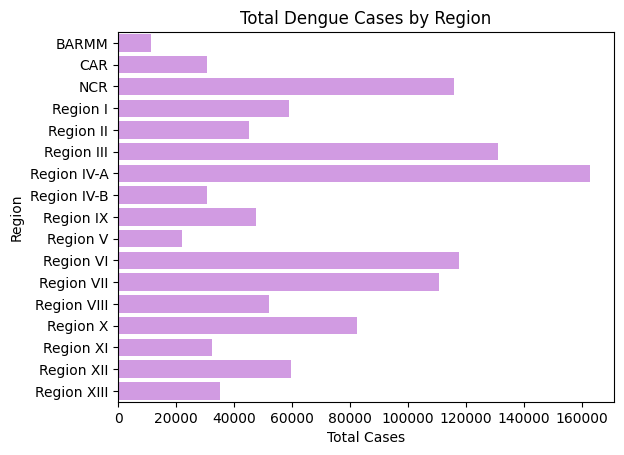

In [10]:
region_cases = dengue.groupby("Region")["Dengue_Cases"].sum().sort_values(ascending=False)
print(region_cases.head())

# visualization
sns.barplot(x=region_cases.values, color='#D78FEE', y=region_cases.index)
plt.title("Total Dengue Cases by Region")
plt.xlabel("Total Cases")
plt.ylabel("Region")
plt.show()


<h1 style="font-size: 15px"><strong>Insight 2:</h1> 
<p> From 2016 to 2020, Region IV-A had the highest number of dengue cases with 163,029, followed by Region III and Region VI.</p>

<h1 style="font-size: 20px"><strong>DENGUE CASES BY REGION AND YEAR THRU HEATMAP</h1>

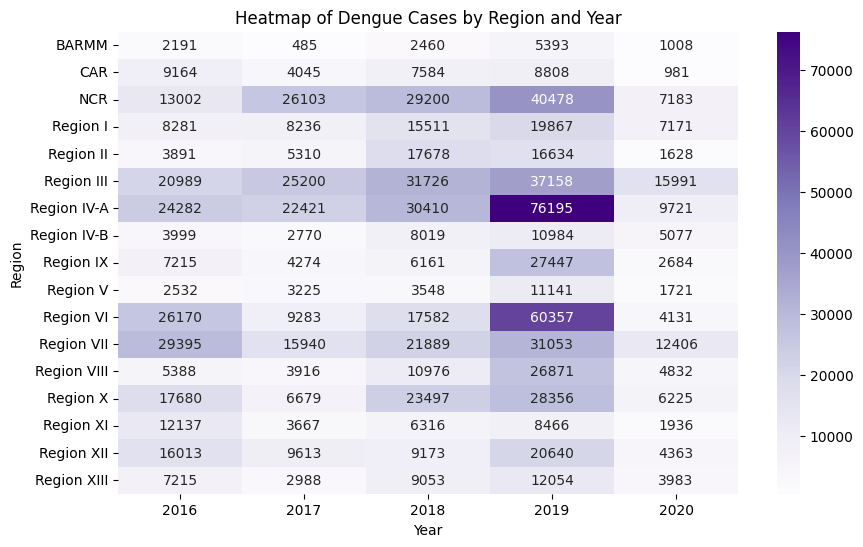

In [11]:
region_year_group = dengue.groupby(["Region", "Year"])["Dengue_Cases"].sum().reset_index()
region_year_heatmap = region_year_group.pivot(index="Region", columns="Year", values="Dengue_Cases")

#visualization
plt.figure(figsize=(10,6))
sns.heatmap(region_year_heatmap, cmap="Purples", annot=True, fmt=".0f")
plt.title("Heatmap of Dengue Cases by Region and Year")
plt.xlabel("Year")
plt.ylabel("Region")
plt.show()


<h3 style="font-size:15px"><strong>Insight 3:</strong></h3>
<p> The heatmap shows that some regions, like NCR, Region IV-A, and Region VI, consistently have higher dengue cases compared to other regions. Regions such as CAR and BARMM show much lower numbers. This means certain regions are more prone to dengue outbreaks than others.</p>

<h2 style="font-size: 15px"><strong>Insight 4:</h2> 
<p> This heatmap shows how dengue cases changed in each region over the years.The darker purple colors mean higher case numbers.
You can see that 2019 had the darkest shades across many regions, showing it was the year with the most dengue cases.
</p>

<h1 style="font-size: 20px"><strong>Average Case Fatality Rate by Region</h1>

Average CFR by Region:
 Region
NCR            0.094127
Region XIII    0.093691
Region XII     0.078923
CAR            0.069733
BARMM          0.065735
Name: CFR, dtype: float64


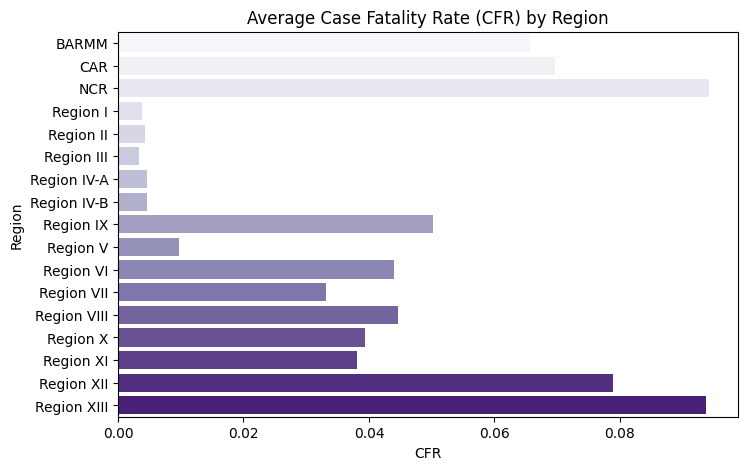

In [23]:
dengue["CFR"] = dengue["Dengue_Deaths"] / dengue["Dengue_Cases"]
cfr_by_region = dengue.groupby("Region")["CFR"].mean().sort_values(ascending=False)
print("Average CFR by Region:\n", cfr_by_region.head())

#visualization
plt.figure(figsize=(8,5))
sns.barplot(x=cfr_by_region.values, y=cfr_by_region.index, palette="Purples")
plt.title("Average Case Fatality Rate (CFR) by Region")
plt.xlabel("CFR")
plt.ylabel("Region")
plt.show()


<h1 style="font-size: 15px"><strong>Insight 5:</h1> 
<p> The aversge Case Fatality Rate (CFR) varies across regions based on the number of reported cases and deaths. NCR, Region XIII, and Region XII have higher CFRs since their proportion of deaths compared to total cases is larger, while Regions IV-A, IV-B, 
and II have lower CFRs because fewer deaths occurred relative to their total number of cases.
</p>

<h1 style="font-size: 20px"><strong>Case Fatality Rate by Region </h1>

In [24]:
regional_cfr = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

regional_cfr["Case_Fatality_Rate (%)"] = np.round(
    (regional_cfr["Dengue_Deaths"] / regional_cfr["Dengue_Cases"]) * 100, 2
)
regional_cfr.head(10)



,Region,Dengue_Deaths,Dengue_Cases,Case_Fatality_Rate (%)
0,BARMM,332,11537,2.88
1,CAR,1008,30582,3.30
2,NCR,4008,115966,3.46
3,Region I,157,59066,0.27
4,Region II,193,45141,0.43
5,Region III,482,131064,0.37
6,Region IV-A,652,163029,0.40
7,Region IV-B,130,30849,0.42
8,Region IX,532,47781,1.11
9,Region V,185,22167,0.83


<h1 style="font-size: 15px"><strong>Insight 6:</h1> 
<p> NCR has the highest Case Fatality Rate (CFR) at 3.46%, followed by CAR (3.30%) and BARMM (2.88%), indicating higher death proportions in these regions.</p>

<h2 style ='font-size: 15px'><strong>Insight 7:</h2>
<p> Regions I, II, III, IV-A, and IV-B show relatively low CFRs, all below 0.5%, suggesting fewer deaths compared to the number of cases

<h3 style = "font-size: 15px"<strong>Insight 8:</h3>
<p>Region IX has a moderate CFR of 1.11%, placing it between the higher and lower regions in terms of fatality rate.</p>

<h1 style="font-size: 20px"><strong>Average Dengue Cases per Year by Region</h1>

In [14]:
regional_avg = dengue.groupby(["Region"])["Dengue_Cases"].mean().reset_index()
regional_avg["Average_Cases"] = np.round(regional_avg["Dengue_Cases"], 2)
regional_avg.head(10)


,Region,Dengue_Cases,Average_Cases
0,BARMM,192.283333,192.28
1,CAR,509.700000,509.70
2,NCR,1932.766667,1932.77
3,Region I,984.433333,984.43
4,Region II,752.350000,752.35
5,Region III,2184.400000,2184.40
6,Region IV-A,2717.150000,2717.15
7,Region IV-B,514.150000,514.15
8,Region IX,796.350000,796.35
9,Region V,369.450000,369.45


<h1 style="font-size: 15px"><strong>Insight 9:</h1> 
<p> Region IV-A has the highest average dengue cases per year at 27,171.15, far exceeding all other regions</p>

<h2 style="font-size: 15px"><strong>Insight 10:</h2> 
<p> BARMM reports the lowest average dengue cases per year at 192.28, indicating fewer recorded cases in that region</p>


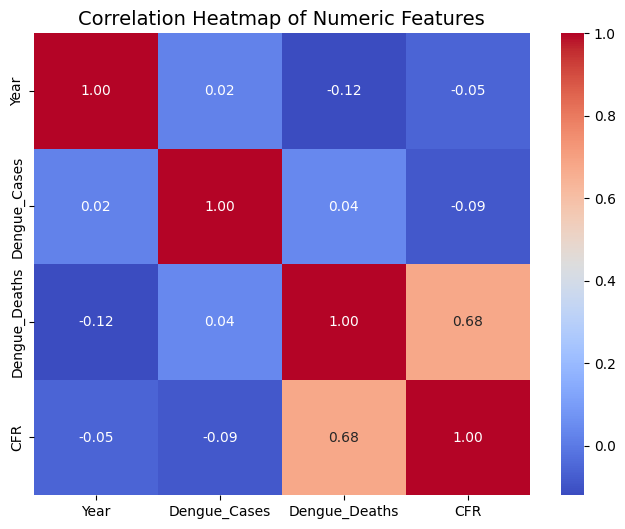

In [22]:
# Select only numeric columns
numeric_df = dengue.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr = numeric_df.corr()

# Display correlation matrix
corr

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()

